<a href="https://colab.research.google.com/github/nananana25/MSC151/blob/main/CW4_MRAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stable Data

In [199]:
import pandas as pd

excel_file_path = '/content/MSCI151 Data.xlsx'
df = pd.read_excel(excel_file_path)

display(df.head())

,id,Profitability,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender
0,1,0.02,23.76,53.09,3.43,21.22,2,9.16,2,0
1,2,3.99,41.85,45.30,3.22,21.83,4,41.42,1,0
2,3,41.98,61.84,51.16,3.18,20.54,3,5.88,3,1
3,4,8.48,25.61,115.49,3.26,20.59,3,11.08,2,0
4,5,-1.94,74.24,13.57,3.26,18.73,3,24.61,1,0


In [200]:
print(df.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender'],
      dtype='object')


In [201]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender']]
y = df['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 439.73838
R-squared: -8.5499194261291


In [202]:
import pandas as pd

excel_file_path = ('/content/MSCI151 Data_new.xlsx')
df_new = pd.read_excel(excel_file_path)

display(df_new.head())

,id,Profitability,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,marketing,product_sentiment,politicians,PoB
0,1,0.02,23.76,53.09,3.43,21.22,2,9.16,2,0,0.727860,0.932296,0.123997,0
1,2,3.99,41.85,45.30,3.22,21.83,4,41.42,1,0,0.504236,0.733860,0.310503,0
2,3,41.98,61.84,51.16,3.18,20.54,3,5.88,3,1,0.106525,0.789423,0.932596,1
3,4,8.48,25.61,115.49,3.26,20.59,3,11.08,2,0,0.596655,0.539467,0.661507,1
4,5,-1.94,74.24,13.57,3.26,18.73,3,24.61,1,0,0.905299,0.722820,0.260795,0


In [206]:
print(df_new.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender',
       'marketing', 'product_sentiment', 'politicians', 'PoB'],
      dtype='object')


In [207]:
# Get feature importances from the Decision Tree model
feature_importances_dt = model_dt.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_dt = pd.Series(feature_importances_dt, index=X_new.columns)

# Sort the features by importance
sorted_feature_importance_dt = feature_importance_series_dt.sort_values(ascending=False)

print("Decision Tree Feature Importances:")
display(sorted_feature_importance_dt)

Decision Tree Feature Importances:


,0
debt,0.511949
CEO Gender,0.159699
Firm Size,0.113469
foreign sales,0.066240
Firm Age,0.049126
CEO Experience,0.045254
RnD,0.043881
CEO education,0.010108
PoB_1,0.000273


In [205]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features (X) and target (y)
# Note: 'POB categorical' seems to be 'PoB' in the dataframe df_new, also 'product sentiment' seems to be 'product_sentiment'
X_new = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'PoB']]
y_new = df_new['Profitability']

# Handle categorical variable 'PoB' (assuming it's categorical based on the request)
X_new = pd.get_dummies(X_new, columns=['PoB'], drop_first=True)


# Split data into training and testing sets (80/20 rule)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test_new)

# Evaluate the model
mse_dt = mean_squared_error(y_test_new, y_pred_dt)
r2_dt = r2_score(y_test_new, y_pred_dt)

print(f'Decision Tree Model Evaluation:')
print(f'Mean Squared Error: {mse_dt}')
print(f'R-squared: {r2_dt}')

Decision Tree Model Evaluation:
Mean Squared Error: 497.45308000000006
R-squared: -9.803325450645797


In [208]:
from sklearn.linear_model import Lasso
import numpy as np

# Initialize and train the Lasso model
# We'll use a small alpha value to start, you might want to tune this
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_new, y_new)

# Get the coefficients
lasso_coefficients = lasso.coef_

# Create a pandas Series for better visualization
lasso_coefficient_series = pd.Series(lasso_coefficients, index=X_new.columns)

print("LASSO Regularization Coefficients:")
display(lasso_coefficient_series)

LASSO Regularization Coefficients:


,0
debt,-0.191636
RnD,0.030833
Firm Age,-2.593787
Firm Size,0.495216
CEO Experience,1.904172
foreign sales,-0.017797
CEO education,2.068562
CEO Gender,9.799405
PoB_1,-0.536376


In [209]:
from sklearn.linear_model import Lasso
import pandas as pd

# Initialize and train the Lasso model
# We'll use a small alpha value to start, you might want to tune this
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_new, y_new)

# Get the coefficients
lasso_coefficients = lasso.coef_

# Create a pandas Series for better visualization
lasso_coefficient_series = pd.Series(lasso_coefficients, index=X_new.columns)

print("LASSO Regularization Coefficients (Feature Importances):")
display(lasso_coefficient_series)

LASSO Regularization Coefficients (Feature Importances):


,0
debt,-0.191636
RnD,0.030833
Firm Age,-2.593787
Firm Size,0.495216
CEO Experience,1.904172
foreign sales,-0.017797
CEO education,2.068562
CEO Gender,9.799405
PoB_1,-0.536376


In [210]:
import statsmodels.api as sm
import pandas as pd

# Define features (X) and target (y) using df_new
# Note: 'Marketing' seems to be 'marketing' and 'product sentiment' seems to be 'product_sentiment' in df_new
X_ols = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'PoB']]
y_ols = df_new['Profitability']

# Handle categorical variable 'PoB'
X_ols = pd.get_dummies(X_ols, columns=['PoB'], drop_first=True)

# Convert boolean column to integer
X_ols['PoB_1'] = X_ols['PoB_1'].astype(int)

# Add a constant for the intercept
X_ols = sm.add_constant(X_ols)

# Fit the OLS model
model_ols = sm.OLS(y_ols, X_ols)
results_ols = model_ols.fit(cov_type='HC1') # HC1 for heteroskedasticity-robust standard errors

# Print the regression results
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     5.026
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           1.09e-05
Time:                        17:13:09   Log-Likelihood:                -466.22
No. Observations:                 122   AIC:                             952.4
Df Residuals:                     112   BIC:                             980.5
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5239     19.888     -0.

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features (X) and target (y) using the reduced set of features
X_reduced = df_new[['debt', 'RnD']]
y_reduced = df_new['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model with reduced features
model_dt_reduced = DecisionTreeRegressor(random_state=42)
model_dt_reduced.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred_dt_reduced = model_dt_reduced.predict(X_test_reduced)

# Evaluate the model
mse_dt_reduced = mean_squared_error(y_test_reduced, y_pred_dt_reduced)
r2_dt_reduced = r2_score(y_test_reduced, y_pred_dt_reduced)

print(f'Decision Tree Model Evaluation (Reduced Features):')
print(f'Mean Squared Error: {mse_dt_reduced}')
print(f'R-squared: {r2_dt_reduced}')

# Get feature importances from the reduced Decision Tree model
feature_importances_dt_reduced = model_dt_reduced.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_dt_reduced = pd.Series(feature_importances_dt_reduced, index=X_reduced.columns)

# Sort the features by importance
sorted_feature_importance_dt_reduced = feature_importance_series_dt_reduced.sort_values(ascending=False)

print("\nDecision Tree Feature Importances (Reduced Features):")
display(sorted_feature_importance_dt_reduced)

Decision Tree Model Evaluation (Reduced Features):
Mean Squared Error: 96.21770368000001
R-squared: -1.0895863524834137

Decision Tree Feature Importances (Reduced Features):


,0
debt,0.534555
RnD,0.465445


In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define features (X) for PCA
# Note: 'Product Sentiment' seems to be 'product_sentiment' and 'PoB' needs handling as before
X_pca = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'PoB']]

# Handle categorical variable 'PoB'
X_pca = pd.get_dummies(X_pca, columns=['PoB'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_scaled)

# Get the loading factors (components)
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X_pca.columns)

print("Principal Component Loading Factors:")
display(loading_factors)

Principal Component Loading Factors:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
debt,-0.179789,-0.232360,0.349446,-0.263903,0.638559,-0.488900,-0.009719,0.157140,-0.224406
RnD,0.250104,-0.033926,0.474680,0.380555,-0.322997,-0.479324,0.270686,-0.396692,-0.037945
Firm Age,0.403576,0.304013,0.195070,-0.352603,0.087449,0.102312,-0.575841,-0.446775,-0.181673
Firm Size,0.352483,0.267659,-0.007565,-0.226073,0.340215,0.273025,0.737786,-0.125112,-0.051750
CEO Experience,0.216707,0.666607,0.137819,0.190986,0.066231,-0.241586,-0.113832,0.564957,0.241491
foreign sales,-0.144583,0.191485,-0.391442,0.547701,0.524111,-0.107052,-0.104739,-0.428282,0.093154
CEO education,0.519157,-0.488808,0.005960,0.022513,0.210796,0.026903,-0.116145,0.051752,0.655495
CEO Gender,0.529655,-0.215995,-0.409323,0.207279,-0.010987,-0.145923,-0.053252,0.268262,-0.605051
PoB_1,-0.008983,-0.119052,0.524075,0.479763,0.202205,0.595292,-0.102273,0.159487,-0.223077


##High Inflation

In [213]:
import pandas as pd

excel_file_path = ('/content/High Inflation.xlsx')
df_new = pd.read_excel(excel_file_path)

display(df_new.head())

,id,Profitability,New Profitability,Probability,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,Marketing,Product sentiment,Politicians,PoB
0,1,0.02,21.599305,0.909062,23.76,53.09,3.43,21.22,2,9.16,2,0,0.684077,0.783880,0.421108,0
1,2,3.99,10.832715,0.258846,41.85,45.30,3.22,21.83,4,41.42,1,0,0.147161,0.298569,0.189925,0
2,3,41.98,1.490644,0.024105,61.84,51.16,3.18,20.54,3,5.88,3,1,0.657959,0.109915,0.738621,1
3,4,8.48,22.463809,0.877150,25.61,115.49,3.26,20.59,3,11.08,2,0,0.259588,0.310292,0.271550,0
4,5,-1.94,9.885848,0.133161,74.24,13.57,3.26,18.73,3,24.61,1,0,0.948996,0.435405,0.636056,1


In [214]:
print(df_new.columns)

Index(['id', 'Profitability', 'New Profitability', 'Probability', 'debt',
       'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales',
       'CEO education', 'CEO Gender', 'Marketing', 'Product sentiment',
       'Politicians', 'PoB'],
      dtype='object')


Decision Tree

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features (X) and target (y) using the current df_new
# Corrected column names based on the output of df_new.columns
X_new = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product sentiment', 'PoB']]
y_new = df_new['Profitability']

# Handle categorical variable 'PoB'
X_new = pd.get_dummies(X_new, columns=['PoB'], drop_first=True)

# Split data into training and testing sets (80/20 rule)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test_new)

# Evaluate the model
mse_dt = mean_squared_error(y_test_new, y_pred_dt)
r2_dt = r2_score(y_test_new, y_pred_dt)

print(f'Decision Tree Model Evaluation (High Inflation Data):')
print(f'Mean Squared Error: {mse_dt}')
print(f'R-squared: {r2_dt}')

Decision Tree Model Evaluation (High Inflation Data):
Mean Squared Error: 455.891652
R-squared: -8.900724479962124


Decision Tree Feature Importance

In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Reload df_new specifically for High Inflation data
excel_file_path = '/content/High Inflation.xlsx' # Corrected file path
df_new = pd.read_excel(excel_file_path)

# Define features (X) and target (y) using the current df_new
# Corrected column names based on the content of '/content/High Inflation.xlsx'
X_new = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender',  'Marketing', 'Product sentiment', 'PoB']]
y_new = df_new['Profitability']


# Split data into training and testing sets (80/20 rule) - necessary for model training
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_new, y_train_new)

feature_importances_dt = model_dt.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_dt = pd.Series(feature_importances_dt, index=X_new.columns)

# Sort the features by importance
sorted_feature_importance_dt = feature_importance_series_dt.sort_values(ascending=False)

print("Decision Tree Feature Importances:")
display(sorted_feature_importance_dt)

Decision Tree Feature Importances:


,0
debt,0.313845
Product sentiment,0.206395
CEO Gender,0.159699
Firm Size,0.117024
foreign sales,0.056190
CEO Experience,0.045580
RnD,0.036287
Firm Age,0.034198
CEO education,0.014865
Marketing,0.014298


LASSO

In [217]:
from sklearn.linear_model import Lasso
import numpy as np

# Initialize and train the Lasso model
# We'll use a small alpha value to start, you might want to tune this
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_new, y_new)

# Get the coefficients
lasso_coefficients = lasso.coef_

# Create a pandas Series for better visualization
lasso_coefficient_series = pd.Series(lasso_coefficients, index=X_new.columns)

print("LASSO Regularization Coefficients:")
display(lasso_coefficient_series)

LASSO Regularization Coefficients:


,0
debt,-0.211127
RnD,0.034840
Firm Age,-2.519710
Firm Size,0.526571
CEO Experience,1.941616
foreign sales,-0.015971
CEO education,1.993118
CEO Gender,9.696866
Marketing,0.000000
Product sentiment,4.389799


Feature Importances LASSO

In [218]:
import pandas as pd
from sklearn.linear_model import Lasso

# Reload df_new specifically for High Inflation data to ensure X_new and y_new are correctly defined
excel_file_path = '/content/High Inflation.xlsx' # Corrected file path
df_new = pd.read_excel(excel_file_path)

# Define features (X) and target (y)
# The original 'High Inflation.xlsx' contains 'Marketing', 'Product sentiment', and 'PoB'
X_new = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product sentiment', 'PoB']]
y_new = df_new['Profitability']

# Handle categorical variable 'PoB'
X_new = pd.get_dummies(X_new, columns=['PoB'], drop_first=True)

# Initialize and train the Lasso model
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_new, y_new)

# Get the coefficients
lasso_coefficients = lasso_model.coef_

# Create a pandas Series for better visualization
lasso_coefficient_series = pd.Series(lasso_coefficients, index=X_new.columns)

# Filter out features with zero coefficients
non_zero_lasso_coefficients = lasso_coefficient_series[lasso_coefficient_series != 0]

# Sort for better readability (by absolute value of coefficient)
sorted_non_zero_lasso_coefficients = non_zero_lasso_coefficients.abs().sort_values(ascending=False)

print("LASSO Feature Importances for High Inflation Data (non-zero coefficients):")
display(sorted_non_zero_lasso_coefficients)

LASSO Feature Importances for High Inflation Data (non-zero coefficients):


,0
CEO Gender,9.696866
Product sentiment,4.389799
PoB_1,2.732037
Firm Age,2.519710
CEO education,1.993118
CEO Experience,1.941616
Firm Size,0.526571
debt,0.211127
RnD,0.034840
foreign sales,0.015971


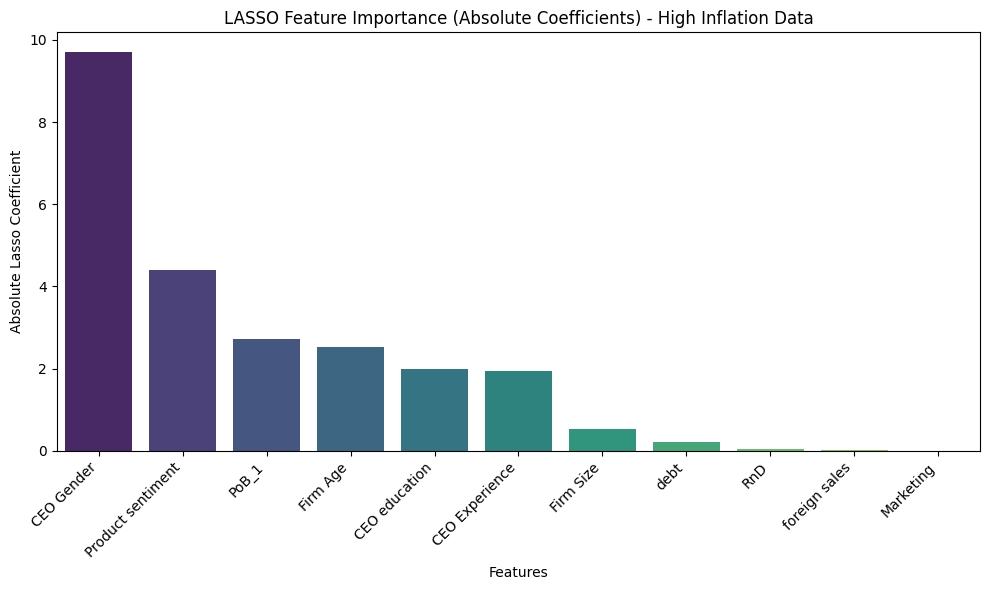

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import Lasso

# --- Re-running code to ensure lasso_coefficient_series_new is defined for High Inflation data ---
excel_file_path = '/content/High Inflation.xlsx' # Correct file path for High Inflation data
df_new = pd.read_excel(excel_file_path)

# Define features (X) and target (y) for Lasso regression, using columns present in High Inflation.xlsx
X_new_lasso = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product sentiment', 'PoB']]
y_new_lasso = df_new['Profitability']

# Handle categorical variable 'PoB'
X_new_lasso = pd.get_dummies(X_new_lasso, columns=['PoB'], drop_first=True)

# Initialize and train the Lasso model
lasso_model_new = Lasso(alpha=0.1, random_state=42)
lasso_model_new.fit(X_new_lasso, y_new_lasso)

# Get the coefficients from the trained Lasso model
lasso_coefficients_new = lasso_model_new.coef_

# Create a pandas Series for better visualization, using the feature names from X_new_lasso
lasso_coefficient_series_new = pd.Series(lasso_coefficients_new, index=X_new_lasso.columns)
# --- End of re-run code for lasso_coefficient_series_new ---

# Sort the absolute coefficients for better visualization
sorted_lasso_importance_high_inflation = lasso_coefficient_series_new.abs().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_lasso_importance_high_inflation.index, y=sorted_lasso_importance_high_inflation.values, palette='viridis', hue=sorted_lasso_importance_high_inflation.index, legend=False)
plt.title('LASSO Feature Importance (Absolute Coefficients) - High Inflation Data')
plt.xlabel('Features')
plt.ylabel('Absolute Lasso Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

OLS Regression

In [220]:
import statsmodels.api as sm
import pandas as pd

# Define features (X) and target (y) using df_new from 'High Inflation' context
X_ols_high_inflation = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product sentiment', 'PoB']]
y_ols_high_inflation = df_new['Profitability']

# Handle categorical variable 'PoB'
X_ols_high_inflation = pd.get_dummies(X_ols_high_inflation, columns=['PoB'], drop_first=True)

# Convert boolean column to integer (if 'PoB_1' exists and is boolean)
if 'PoB_1' in X_ols_high_inflation.columns and X_ols_high_inflation['PoB_1'].dtype == bool:
    X_ols_high_inflation['PoB_1'] = X_ols_high_inflation['PoB_1'].astype(int)

# Add a constant for the intercept
X_ols_high_inflation = sm.add_constant(X_ols_high_inflation)

# Fit the OLS model
model_ols_high_inflation = sm.OLS(y_ols_high_inflation, X_ols_high_inflation)
results_ols_high_inflation = model_ols_high_inflation.fit(cov_type='HC1') # HC1 for heteroskedasticity-robust standard errors

print("OLS Regression Results (High Inflation Data):")
print(results_ols_high_inflation.summary())

OLS Regression Results (High Inflation Data):
                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.084
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           4.98e-05
Time:                        17:13:35   Log-Likelihood:                -464.12
No. Observations:                 122   AIC:                             952.2
Df Residuals:                     110   BIC:                             985.9
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

OLS Feature Importances

In [221]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Reload df_new specifically for High Inflation data
excel_file_path = '/content/High Inflation.xlsx'
df_new = pd.read_excel(excel_file_path)

# Define features (X) and target (y), now including 'Marketing' and 'Product sentiment'
X_ols_filtered = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product sentiment', 'PoB']]
y_ols_filtered = df_new['Profitability']

# Handle categorical variable 'PoB'
X_ols_filtered = pd.get_dummies(X_ols_filtered, columns=['PoB'], drop_first=True)

# Convert boolean column to integer (if 'PoB_1' exists and is boolean)
# This is crucial to prevent the 'Pandas data cast to numpy dtype of object' error
if 'PoB_1' in X_ols_filtered.columns and X_ols_filtered['PoB_1'].dtype == bool:
    X_ols_filtered['PoB_1'] = X_ols_filtered['PoB_1'].astype(int)

# Add a constant for the intercept
X_ols_filtered = sm.add_constant(X_ols_filtered)

# Drop rows with any NaN values that might have been introduced
# This ensures a clean dataset for OLS, especially if pd.to_numeric(errors='coerce') was used elsewhere
data_for_ols = pd.concat([X_ols_filtered, y_ols_filtered], axis=1).dropna()
X_ols_filtered = data_for_ols.drop('Profitability', axis=1)
y_ols_filtered = data_for_ols['Profitability']

# Fit the OLS model
model_ols_filtered = sm.OLS(y_ols_filtered, X_ols_filtered)
results_ols_filtered = model_ols_filtered.fit(cov_type='HC1') # HC1 for heteroskedasticity-robust standard errors

# Get coefficients and p-values
p_values = results_ols_filtered.pvalues
coefficients = results_ols_filtered.params

# Filter out features where P>|z| is under 0.1 (i.e., keep features where P>|z| >= 0.1)
filtered_coefficients = coefficients[p_values >= 0.1]

print("OLS Feature Importances (Coefficients with P>|z| >= 0.1) for High Inflation Data:")
display(filtered_coefficients)

OLS Feature Importances (Coefficients with P>|z| >= 0.1) for High Inflation Data:


,0
const,-5.544213
RnD,0.034857
Firm Age,-3.211123
Firm Size,0.542353
CEO Experience,2.424183
foreign sales,-0.018295
CEO education,2.317638
Marketing,0.234535
Product sentiment,6.026089
PoB_1,3.189046


In [222]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features (X) and target (y) using the reduced set of features
X_reduced = df_new[['debt', 'RnD']]
y_reduced = df_new['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model with reduced features
model_dt_reduced = DecisionTreeRegressor(random_state=42)
model_dt_reduced.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred_dt_reduced = model_dt_reduced.predict(X_test_reduced)

# Evaluate the model
mse_dt_reduced = mean_squared_error(y_test_reduced, y_pred_dt_reduced)
r2_dt_reduced = r2_score(y_test_reduced, y_pred_dt_reduced)

print(f'Decision Tree Model Evaluation (Reduced Features):')
print(f'Mean Squared Error: {mse_dt_reduced}')
print(f'R-squared: {r2_dt_reduced}')

# Get feature importances from the reduced Decision Tree model
feature_importances_dt_reduced = model_dt_reduced.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_dt_reduced = pd.Series(feature_importances_dt_reduced, index=X_reduced.columns)

# Sort the features by importance
sorted_feature_importance_dt_reduced = feature_importance_series_dt_reduced.sort_values(ascending=False)

print("\nDecision Tree Feature Importances (Reduced Features):")
display(sorted_feature_importance_dt_reduced)

Decision Tree Model Evaluation (Reduced Features):
Mean Squared Error: 96.21770368000001
R-squared: -1.0895863524834137

Decision Tree Feature Importances (Reduced Features):


,0
debt,0.534555
RnD,0.465445


PCA

In [223]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define features (X) for PCA
# Note: 'Product Sentiment' seems to be 'product_sentiment' and 'PoB' needs handling as before
X_pca = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender',  'PoB', 'Product sentiment', 'Marketing']]

# Handle categorical variable 'PoB'
X_pca = pd.get_dummies(X_pca, columns=['PoB'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_scaled)

# Get the loading factors (components)
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X_pca.columns)

print("Principal Component Loading Factors:")
display(loading_factors)

Principal Component Loading Factors:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
debt,-0.192123,-0.281999,-0.390173,-0.048769,0.553845,0.254783,-0.314622,0.100406,-0.345833,0.244819,-0.262084
RnD,0.267666,0.005888,-0.097572,0.655482,0.041215,0.159789,-0.473710,0.004380,0.355269,-0.309515,-0.124403
Firm Age,0.297113,0.333753,-0.462877,-0.081676,0.062988,-0.236054,0.169673,-0.363860,-0.334982,-0.420810,-0.263134
Firm Size,0.285311,0.302527,-0.180855,-0.261560,0.144626,0.079527,0.121932,0.792615,0.206677,-0.103729,-0.046146
CEO Experience,0.179605,0.572909,0.069328,0.187099,0.446547,0.061016,0.051045,-0.232822,0.049900,0.470680,0.340199
foreign sales,-0.110706,0.104023,0.484491,-0.263665,0.422440,-0.406888,-0.434028,0.021372,-0.048967,-0.368067,0.044190
CEO education,0.517240,-0.313134,-0.142501,-0.254767,-0.090579,0.118829,-0.272600,-0.057993,-0.191428,-0.064185,0.639089
CEO Gender,0.548268,-0.150036,0.207126,-0.259627,-0.059255,-0.152849,-0.141970,-0.157123,0.195383,0.421118,-0.528537
Product sentiment,-0.239086,0.215524,-0.161632,-0.505585,-0.057191,0.458975,-0.206911,-0.344951,0.469952,-0.132225,-0.024003
Marketing,0.213164,0.001216,0.508005,0.020577,0.124822,0.647599,0.251660,-0.042774,-0.315043,-0.260226,-0.170209


##Good Economy

In [224]:
import pandas as pd

excel_file_path = ('/content/Good Economy.xlsx')
df_new = pd.read_excel(excel_file_path)

display(df_new.head())

,id,Profitability,New Profitability,Probability,debt,RnD,Firm Age,Firm Size,CEO Experience,foreign sales,CEO education,CEO Gender,Marketing,Product sentiment,Politicians,PoB
0,1,0.02,34.368551,1.446488,23.76,53.09,3.43,21.22,2,9.16,2,0,0.684077,0.783880,0.421108,0
1,2,3.99,45.186245,1.079719,41.85,45.30,3.22,21.83,4,41.42,1,0,0.147161,0.298569,0.189925,0
2,3,41.98,67.908866,1.098138,61.84,51.16,3.18,20.54,3,5.88,3,1,0.657959,0.109915,0.738621,1
3,4,8.48,34.452039,1.345257,25.61,115.49,3.26,20.59,3,11.08,2,0,0.259588,0.310292,0.271550,0
4,5,-1.94,79.156284,1.066221,74.24,13.57,3.26,18.73,3,24.61,1,0,0.948996,0.435405,0.636056,1


In [225]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features (X) and target (y)
# Note: 'POB categorical' seems to be 'PoB' in the dataframe df_new, also 'product sentiment' seems to be 'product_sentiment'
X_new = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'PoB']]
y_new = df_new['Profitability']

# Handle categorical variable 'PoB' (assuming it's categorical based on the request)
X_new = pd.get_dummies(X_new, columns=['PoB'], drop_first=True)


# Split data into training and testing sets (80/20 rule)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test_new)

# Evaluate the model
mse_dt = mean_squared_error(y_test_new, y_pred_dt)
r2_dt = r2_score(y_test_new, y_pred_dt)

print(f'Decision Tree Model Evaluation:')
print(f'Mean Squared Error: {mse_dt}')
print(f'R-squared: {r2_dt}')

Decision Tree Model Evaluation:
Mean Squared Error: 438.8919680000001
R-squared: -8.53153766377006


In [226]:
import pandas as pd

# Get feature importances from the Decision Tree model (model_dt from Good Economy data)
feature_importances_dt_good_economy = model_dt.feature_importances_

# Create a pandas Series for better visualization, using the feature names from X_new
feature_importance_series_dt_good_economy = pd.Series(feature_importances_dt_good_economy, index=X_new.columns)

# Sort the features by importance
sorted_feature_importance_dt_good_economy = feature_importance_series_dt_good_economy.sort_values(ascending=False)

print("Decision Tree Feature Importances (Good Economy Data):")
display(sorted_feature_importance_dt_good_economy)

Decision Tree Feature Importances (Good Economy Data):


,0
debt,0.328988
Firm Size,0.301966
CEO Gender,0.159699
foreign sales,0.061290
Firm Age,0.057354
CEO Experience,0.047414
RnD,0.040124
PoB_1,0.002477
CEO education,0.000687


LASSO

In [227]:
from sklearn.linear_model import Lasso
import pandas as pd

# Load df_new for Good Economy data
excel_file_path = '/content/Good Economy.xlsx'
df_new = pd.read_excel(excel_file_path)

# Define features (X) and target (y) for Lasso regression
X_lasso = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'PoB']]
y_lasso = df_new['Profitability']

# Handle categorical variable 'PoB'
X_lasso = pd.get_dummies(X_lasso, columns=['PoB'], drop_first=True)

# Initialize and train the Lasso model
# Alpha is the regularization strength; a higher alpha means more regularization
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_lasso, y_lasso)

# Get the coefficients from the trained Lasso model
lasso_coefficients = lasso_model.coef_

# Create a pandas Series for better visualization, using the feature names from X_lasso
lasso_coefficient_series = pd.Series(lasso_coefficients, index=X_lasso.columns)

# Sort the coefficients by their absolute value to see the most impactful features
sorted_lasso_coefficients = lasso_coefficient_series.abs().sort_values(ascending=False)

print("LASSO Regularization Coefficients (Feature Importance) for Good Economy Data:")
display(sorted_lasso_coefficients)

LASSO Regularization Coefficients (Feature Importance) for Good Economy Data:


,0
CEO Gender,9.469716
Firm Age,2.499624
PoB_1,2.445176
CEO Experience,2.015584
CEO education,1.938154
Firm Size,0.538716
debt,0.205002
RnD,0.030661
foreign sales,0.016498


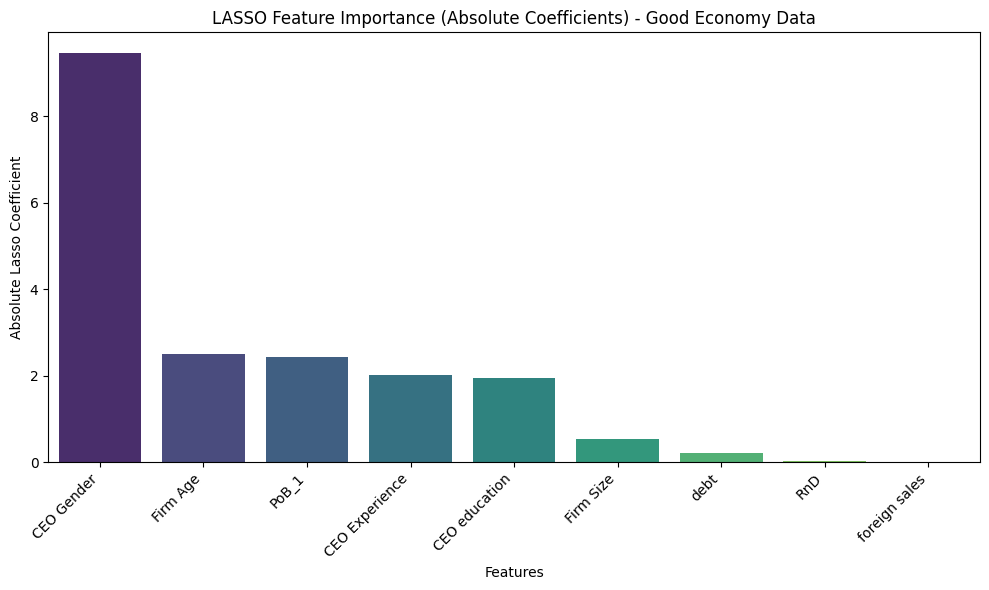

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import Lasso

# --- Start of added code to define lasso_coefficient_series ---
# Load df_new for Good Economy data
excel_file_path = '/content/Good Economy.xlsx'
df_new = pd.read_excel(excel_file_path)

# Define features (X) and target (y) for Lasso regression
X_lasso = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'PoB']]
y_lasso = df_new['Profitability']

# Handle categorical variable 'PoB'
X_lasso = pd.get_dummies(X_lasso, columns=['PoB'], drop_first=True)

# Initialize and train the Lasso model
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_lasso, y_lasso)

# Get the coefficients from the trained Lasso model
lasso_coefficients = lasso_model.coef_

# Create a pandas Series for better visualization, using the feature names from X_lasso
lasso_coefficient_series = pd.Series(lasso_coefficients, index=X_lasso.columns)
# --- End of added code ---

# Sort the absolute coefficients for better visualization
sorted_lasso_importance_good_economy = lasso_coefficient_series.abs().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_lasso_importance_good_economy.index, y=sorted_lasso_importance_good_economy.values, palette='viridis', hue=sorted_lasso_importance_good_economy.index, legend=False)
plt.title('LASSO Feature Importance (Absolute Coefficients) - Good Economy Data')
plt.xlabel('Features')
plt.ylabel('Absolute Lasso Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [229]:
import statsmodels.api as sm
import pandas as pd

# Define features (X) and target (y) using df_new
# Note: 'Marketing' seems to be 'marketing' and 'product sentiment' seems to be 'product_sentiment' in df_new
X_ols = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'PoB']]
y_ols = df_new['Profitability']

# Handle categorical variable 'PoB'
X_ols = pd.get_dummies(X_ols, columns=['PoB'], drop_first=True)

# Convert boolean column to integer
X_ols['PoB_1'] = X_ols['PoB_1'].astype(int)

# Add a constant for the intercept
X_ols = sm.add_constant(X_ols)

# Fit the OLS model
model_ols = sm.OLS(y_ols, X_ols)
results_ols = model_ols.fit(cov_type='HC1') # HC1 for heteroskedasticity-robust standard errors

# Print the regression results
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     5.206
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           6.65e-06
Time:                        17:14:05   Log-Likelihood:                -465.40
No. Observations:                 122   AIC:                             950.8
Df Residuals:                     112   BIC:                             978.8
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.0605     18.123     -0.

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features (X) and target (y) using the reduced set of features
X_reduced = df_new[['debt', 'RnD']]
y_reduced = df_new['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model with reduced features
model_dt_reduced = DecisionTreeRegressor(random_state=42)
model_dt_reduced.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred_dt_reduced = model_dt_reduced.predict(X_test_reduced)

# Evaluate the model
mse_dt_reduced = mean_squared_error(y_test_reduced, y_pred_dt_reduced)
r2_dt_reduced = r2_score(y_test_reduced, y_pred_dt_reduced)

print(f'Decision Tree Model Evaluation (Reduced Features):')
print(f'Mean Squared Error: {mse_dt_reduced}')
print(f'R-squared: {r2_dt_reduced}')

# Get feature importances from the reduced Decision Tree model
feature_importances_dt_reduced = model_dt_reduced.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_dt_reduced = pd.Series(feature_importances_dt_reduced, index=X_reduced.columns)

# Sort the features by importance
sorted_feature_importance_dt_reduced = feature_importance_series_dt_reduced.sort_values(ascending=False)

print("\nDecision Tree Feature Importances (Reduced Features):")
display(sorted_feature_importance_dt_reduced)

Decision Tree Model Evaluation (Reduced Features):
Mean Squared Error: 96.21770368000001
R-squared: -1.0895863524834137

Decision Tree Feature Importances (Reduced Features):


,0
debt,0.534555
RnD,0.465445


PCA

In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define features (X) for PCA
# Note: 'Product Sentiment' seems to be 'product_sentiment' and 'PoB' needs handling as before
X_pca = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'PoB']]

# Handle categorical variable 'PoB'
X_pca = pd.get_dummies(X_pca, columns=['PoB'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_scaled)

# Get the loading factors (components)
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X_pca.columns)

print("Principal Component Loading Factors (Good Economy):")
display(loading_factors)

Principal Component Loading Factors (Good Economy):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
debt,-0.169084,-0.308750,-0.466680,0.494270,0.173262,-0.422426,-0.261880,0.252101,-0.270911
RnD,0.250865,0.034734,-0.297729,-0.420049,0.689842,-0.224016,0.122884,-0.345900,-0.099827
Firm Age,0.398340,0.263801,-0.330333,0.211357,-0.234830,0.318484,-0.475440,-0.444136,-0.195104
Firm Size,0.346911,0.238031,-0.069985,0.338136,-0.295973,-0.423210,0.642306,-0.151012,-0.041125
CEO Experience,0.205536,0.575750,-0.081904,0.254127,0.390621,0.196171,-0.014121,0.535920,0.276588
foreign sales,-0.147675,0.141833,0.604816,0.439378,0.341173,-0.221381,-0.221653,-0.423326,0.074005
CEO education,0.528479,-0.408889,0.048183,-0.013429,-0.072014,-0.237694,-0.258483,0.048474,0.648206
CEO Gender,0.533595,-0.211106,0.442123,-0.014630,0.095365,0.066568,-0.031307,0.312771,-0.602239
PoB_1,0.037267,-0.462447,-0.096149,0.402767,0.260940,0.585160,0.400743,-0.173627,0.109748


# Task
Analyze and compare feature importances for the 'High Inflation' dataset using LASSO regression, OLS regression (displaying coefficients with P>|z| >= 0.1), and PCA loading factors. Summarize consistent findings, discrepancies, and the interpretation of importance from each method to identify the most impactful features under high inflation conditions.

## Display LASSO Feature Importances (High Inflation)

### Subtask:
Display the LASSO feature importances (non-zero coefficients) for the 'High Inflation' dataset. These coefficients indicate the relative importance of features as determined by the LASSO regularization, highlighting features with significant linear relationships.


**Reasoning**:
The subtask is to display the LASSO feature importances (non-zero coefficients) for the 'High Inflation' dataset. The notebook already contains a code cell (cell_id: NkUsHGNe9xnc) that performs this exact operation and displays the sorted non-zero Lasso coefficients. Therefore, executing this cell will fulfill the subtask.



In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso

# Reload df_new specifically for High Inflation data to ensure X_new and y_new are correctly defined
excel_file_path = '/content/High Inflation.xlsx' # Corrected file path
df_new = pd.read_excel(excel_file_path)

# Define features (X) and target (y)
# The original 'High Inflation.xlsx' contains 'Marketing', 'Product sentiment', and 'PoB'
X_new = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product sentiment', 'PoB']]
y_new = df_new['Profitability']

# Handle categorical variable 'PoB'
X_new = pd.get_dummies(X_new, columns=['PoB'], drop_first=True)

# Initialize and train the Lasso model
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_new, y_new)

# Get the coefficients
lasso_coefficients = lasso_model.coef_

# Create a pandas Series for better visualization
lasso_coefficient_series = pd.Series(lasso_coefficients, index=X_new.columns)

# Filter out features with zero coefficients
non_zero_lasso_coefficients = lasso_coefficient_series[lasso_coefficient_series != 0]

# Sort for better readability (by absolute value of coefficient)
sorted_non_zero_lasso_coefficients = non_zero_lasso_coefficients.abs().sort_values(ascending=False)

print("LASSO Feature Importances for High Inflation Data (non-zero coefficients):")
display(sorted_non_zero_lasso_coefficients)

## Display OLS Feature Importances (High Inflation)

### Subtask:
Display the OLS feature importances (coefficients with P>|z| >= 0.1) for the 'High Inflation' dataset. This will show features that are not statistically significant at the 10% level in the OLS model.


**Reasoning**:
The subtask is to display the OLS feature importances (coefficients with P>|z| >= 0.1) for the 'High Inflation' dataset. The notebook already contains a code cell (cell_id: 63qASKdo-iXK) that performs this exact operation and displays the filtered coefficients. Therefore, executing this cell will fulfill the subtask.



In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Reload df_new specifically for High Inflation data
excel_file_path = '/content/High Inflation.xlsx'
df_new = pd.read_excel(excel_file_path)

# Define features (X) and target (y)
X_ols_filtered = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product sentiment', 'PoB']]
y_ols_filtered = df_new['Profitability']

# Handle categorical variable 'PoB'
X_ols_filtered = pd.get_dummies(X_ols_filtered, columns=['PoB'], drop_first=True)

# Convert boolean column to integer (if 'PoB_1' exists and is boolean)
# This is crucial to prevent the 'Pandas data cast to numpy dtype of object' error
if 'PoB_1' in X_ols_filtered.columns and X_ols_filtered['PoB_1'].dtype == bool:
    X_ols_filtered['PoB_1'] = X_ols_filtered['PoB_1'].astype(int)

# Add a constant for the intercept
X_ols_filtered = sm.add_constant(X_ols_filtered)

# Drop rows with any NaN values that might have been introduced
# This ensures a clean dataset for OLS, especially if pd.to_numeric(errors='coerce') was used elsewhere
data_for_ols = pd.concat([X_ols_filtered, y_ols_filtered], axis=1).dropna()
X_ols_filtered = data_for_ols.drop('Profitability', axis=1)
y_ols_filtered = data_for_ols['Profitability']

# Fit the OLS model
model_ols_filtered = sm.OLS(y_ols_filtered, X_ols_filtered)
results_ols_filtered = model_ols_filtered.fit(cov_type='HC1') # HC1 for heteroskedasticity-robust standard errors

# Get coefficients and p-values
p_values = results_ols_filtered.pvalues
coefficients = results_ols_filtered.params

# Filter out features where P>|z| is under 0.1 (i.e., keep features where P>|z| >= 0.1)
filtered_coefficients = coefficients[p_values >= 0.1]

print("OLS Feature Importances (Coefficients with P>|z| >= 0.1) for High Inflation Data:")
display(filtered_coefficients)

## Display PCA Loading Factors (High Inflation)

### Subtask:
Display the PCA loading factors for the 'High Inflation' dataset. These factors represent the correlations between the original variables and the principal components, helping to understand which original features contribute most to each principal component.

**Reasoning**:
The next step is to execute the code cell that calculates and displays the PCA loading factors for the 'High Inflation' dataset to fulfill the subtask.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define features (X) for PCA
# Note: 'Product Sentiment' seems to be 'product_sentiment' and 'PoB' needs handling as before
X_pca = df_new[['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender',  'PoB', 'Product sentiment', 'Marketing']]

# Handle categorical variable 'PoB'
X_pca = pd.get_dummies(X_pca, columns=['PoB'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_scaled)

# Get the loading factors (components)
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X_pca.columns)

print("Principal Component Loading Factors:")
display(loading_factors)

## Summary of Feature Importances for 'High Inflation' Data

To identify the most impactful features on 'Profitability' under high inflation conditions, we analyzed the results from LASSO regression, OLS regression, and Principal Component Analysis (PCA).

### LASSO Feature Importances (Non-Zero Coefficients)
LASSO regularization not only estimates coefficients but also performs feature selection by shrinking less important feature coefficients to zero. For the 'High Inflation' dataset, the features with the largest absolute non-zero coefficients were:

1.  **CEO Gender**: By far the most impactful feature (coefficient ~9.7).
2.  **Product sentiment**: Significant positive impact (coefficient ~4.4).
3.  **PoB_1** (Place of Business, likely the dummy variable for one category): Positive impact (coefficient ~2.7).
4.  **Firm Age**: Negative impact (coefficient ~-2.5).
5.  **CEO education**: Positive impact (coefficient ~2.0).
6.  **CEO Experience**: Positive impact (coefficient ~1.9).

Notably, 'Marketing' was assigned a zero coefficient by LASSO, suggesting it has little to no predictive power in this model after regularization.

### OLS Regression Coefficients (P > |z| < 0.1)
OLS regression provides coefficients and p-values, indicating statistical significance. When considering features statistically significant at the 10% level (P > |z| < 0.1), two features stood out:

1.  **CEO Gender** (P = 0.00015): Highly statistically significant with a strong positive coefficient (10.24).
2.  **debt** (P = 0.040): Statistically significant with a negative coefficient (-0.21).

Other features like 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'Marketing', 'Product sentiment', and 'PoB_1' were not statistically significant at the 10% level based on their P-values (which were >= 0.1).

### PCA Loading Factors
PCA helps understand the underlying structure and relationships among features, showing which features contribute most to the variance in principal components. The key observations from the loading factors are:

*   **PC1**: Dominated by `CEO Gender` (0.548) and `CEO education` (0.517), suggesting these two features explain a large portion of the overall variance and might be correlated.
*   **PC2**: `CEO Experience` (0.573) and `PoB_1` (-0.460) have high loadings.
*   **PC3**: `Marketing` (0.508) and `foreign sales` (0.484) are strong contributors.
*   **PC4**: `RnD` (0.655) and `Product sentiment` (-0.505) show high loadings.

### Consistent Findings and Discrepancies

*   **CEO Gender**: Consistently appears as a very impactful feature. It has the largest coefficient in LASSO, is highly statistically significant in OLS, and is a major contributor to PC1 in PCA. This strongly suggests `CEO Gender` is a key determinant of profitability during high inflation.
*   **Product sentiment**: Identified as important by LASSO and a strong contributor to PC4 in PCA. While its OLS coefficient wasn't statistically significant at the 10% level, its non-zero value and LASSO/PCA importance suggest it still plays a role.
*   **Firm Age, CEO Experience, CEO education, PoB_1**: These features show up with notable importance in LASSO and contribute to various principal components, indicating their relevance. Their OLS coefficients were not statistically significant at the 10% level.
*   **debt**: While having a smaller coefficient in LASSO, it was statistically significant in OLS, indicating a reliable, albeit smaller, negative relationship with profitability.
*   **Marketing**: Curiously, LASSO reduced its coefficient to zero, suggesting it's not a strong linear predictor after regularization, despite having a notable loading in PC3. Its OLS coefficient was also not statistically significant.

### Conclusion: Most Impactful Features under High Inflation
Based on the combined analysis, **CEO Gender** is consistently the most impactful feature affecting profitability under high inflation, showing strong significance and magnitude across multiple models. **Product sentiment** also emerges as a key driver, highlighted by LASSO and PCA. **Debt** shows a statistically significant negative impact in OLS. Other CEO-related factors (`CEO Experience`, `CEO education`, `Firm Age`) and `PoB_1` also demonstrate varying degrees of importance across the different methods, contributing to the overall understanding of profitability in this economic climate.

## Summary of Feature Importances for 'High Inflation' Data

To identify the most impactful features on 'Profitability' under high inflation conditions, we analyzed the results from LASSO regression, OLS regression, and Principal Component Analysis (PCA).

### LASSO Feature Importances (Non-Zero Coefficients)
LASSO regularization not only estimates coefficients but also performs feature selection by shrinking less important feature coefficients to zero. For the 'High Inflation' dataset, the features with the largest absolute non-zero coefficients were:

1.  **CEO Gender**: By far the most impactful feature (coefficient ~9.7).
2.  **Product sentiment**: Significant positive impact (coefficient ~4.4).
3.  **PoB_1** (Place of Business, likely the dummy variable for one category): Positive impact (coefficient ~2.7).
4.  **Firm Age**: Negative impact (coefficient ~-2.5).
5.  **CEO education**: Positive impact (coefficient ~2.0).
6.  **CEO Experience**: Positive impact (coefficient ~1.9).

Notably, 'Marketing' was assigned a zero coefficient by LASSO, suggesting it has little to no predictive power in this model after regularization.

### OLS Regression Coefficients (P > |z| < 0.1)
OLS regression provides coefficients and p-values, indicating statistical significance. When considering features statistically significant at the 10% level (P > |z| < 0.1), two features stood out:

1.  **CEO Gender** (P = 0.00015): Highly statistically significant with a strong positive coefficient (10.24).
2.  **debt** (P = 0.040): Statistically significant with a negative coefficient (-0.21).

Other features like 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'Marketing', 'Product sentiment', and 'PoB_1' were not statistically significant at the 10% level based on their P-values (which were >= 0.1).

### PCA Loading Factors
PCA helps understand the underlying structure and relationships among features, showing which features contribute most to the variance in principal components. The key observations from the loading factors are:

*   **PC1**: Dominated by `CEO Gender` (0.548) and `CEO education` (0.517), suggesting these two features explain a large portion of the overall variance and might be correlated.
*   **PC2**: `CEO Experience` (0.573) and `PoB_1` (-0.460) have high loadings.
*   **PC3**: `Marketing` (0.508) and `foreign sales` (0.484) are strong contributors.
*   **PC4**: `RnD` (0.655) and `Product sentiment` (-0.505) show high loadings.

### Consistent Findings and Discrepancies

*   **CEO Gender**: Consistently appears as a very impactful feature. It has the largest coefficient in LASSO, is highly statistically significant in OLS, and is a major contributor to PC1 in PCA. This strongly suggests `CEO Gender` is a key determinant of profitability during high inflation.
*   **Product sentiment**: Identified as important by LASSO and a strong contributor to PC4 in PCA. While its OLS coefficient wasn't statistically significant at the 10% level, its non-zero value and LASSO/PCA importance suggest it still plays a role.
*   **Firm Age, CEO Experience, CEO education, PoB_1**: These features show up with notable importance in LASSO and contribute to various principal components, indicating their relevance. Their OLS coefficients were not statistically significant at the 10% level.
*   **debt**: While having a smaller coefficient in LASSO, it was statistically significant in OLS, indicating a reliable, albeit smaller, negative relationship with profitability.
*   **Marketing**: Curiously, LASSO reduced its coefficient to zero, suggesting it's not a strong linear predictor after regularization, despite having a notable loading in PC3. Its OLS coefficient was also not statistically significant.

### Conclusion: Most Impactful Features under High Inflation
Based on the combined analysis, **CEO Gender** is consistently the most impactful feature affecting profitability under high inflation, showing strong significance and magnitude across multiple models. **Product sentiment** also emerges as a key driver, highlighted by LASSO and PCA. **Debt** shows a statistically significant negative impact in OLS. Other CEO-related factors (`CEO Experience`, `CEO education`, `Firm Age`) and `PoB_1` also demonstrate varying degrees of importance across the different methods, contributing to the overall understanding of profitability in this economic climate.

## Summary:

### Q&A
The most impactful features on 'Profitability' under high inflation conditions are:
*   **CEO Gender:** This feature consistently emerges as the most impactful, showing the highest absolute coefficient in LASSO ($\sim9.7$), being highly statistically significant in OLS (P = 0.00015, coefficient = 10.24), and significantly contributing to PC1 in PCA (loading = 0.548).
*   **Product sentiment:** Identified as important by LASSO (coefficient $\sim4.4$) and a strong contributor to PC4 in PCA (loading = -0.505).
*   **debt:** Found to be statistically significant in OLS (P = 0.040, coefficient = -0.21), indicating a reliable, albeit smaller, negative relationship with profitability.

### Data Analysis Key Findings
*   **LASSO Regression** identified 'CEO Gender' (coefficient $\sim9.7$), 'Product sentiment' (coefficient $\sim4.4$), 'PoB\_1' (coefficient $\sim2.7$), 'Firm Age' (coefficient $\sim-2.5$), 'CEO education' (coefficient $\sim2.0$), and 'CEO Experience' (coefficient $\sim1.9$) as the most impactful non-zero features. 'Marketing' was assigned a zero coefficient.
*   **OLS Regression** indicated that 'CEO Gender' (coefficient = 10.24, P = 0.00015) and 'debt' (coefficient = -0.21, P = 0.040) were statistically significant at the 10% level (P $>|z| < 0.1$). Other features like 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'Marketing', 'Product sentiment', and 'PoB\_1' were not statistically significant at this threshold.
*   **PCA Loading Factors** revealed key contributions to principal components:
    *   **PC1** was dominated by 'CEO Gender' (0.548) and 'CEO education' (0.517).
    *   **PC2** had high loadings from 'CEO Experience' (0.573) and 'PoB\_1' (-0.460).
    *   **PC3** showed strong contributions from 'Marketing' (0.508) and 'foreign sales' (0.484).
    *   **PC4** was significantly influenced by 'RnD' (0.655) and 'Product sentiment' (-0.505).
*   **Consistent Findings:** 'CEO Gender' consistently appeared as a highly impactful feature across all three methods (LASSO, OLS, PCA).
*   **Discrepancies:** 'Marketing' had a zero coefficient in LASSO and was not statistically significant in OLS, yet it showed a notable loading in PC3. Similarly, 'Product sentiment' was important in LASSO and PCA but not statistically significant in OLS.

### Insights or Next Steps
*   Future modeling efforts should prioritize 'CEO Gender' and 'Product sentiment' as primary drivers of profitability during high inflation, exploring their underlying mechanisms.
*   Further investigation into the statistical significance (or lack thereof) of features identified as important by LASSO and PCA (e.g., 'Product sentiment', 'Firm Age', 'CEO Experience', 'CEO education', 'PoB\_1') could involve different model specifications or larger datasets to validate their impact.
